# Cars Prices Prediction

Author: **Chadrack Kavula Mulamba**  
Date: **12 April 2023**   
Source: **https://www.kaggle.com**   
Github url: **https://github.com/chadrack-123/219001710_ASS_3_Descriptive_Analysis/blob/main/Assignment%203.ipynb**  

This document contains collection of used car listings with various attributes such as year, make, model, condition, transmission, cylinders, fuel type, odometer reading, engine power, mileage, and price.

1.Model years range from 1999 to 2016.   
2.Various car manufacturers are included, such as Chevrolet, Chrysler, Jeep, Buick, Ford, Kia, Ram, Lexus, Toyota, Pontiac, Volkswagen, and Nissan.   
3.The dataset covers various car models from the mentioned manufacturers.
4.Cars are in conditions of Excellent or Salvage.  
5.Both manual and automatic transmissions are present in the dataset.   
6.Cars have 4, 6, or 8 cylinders.   
7.Cars use either gas or diesel as fuel.   
8.Odometer readings vary widely, from as low as 12,458 miles to as high as 335,044 miles.  
9.Engine power is categorized into Low CC, Avg CC, and High CC.   
10.Mileage values range from 5 to 49 miles per gallon.   



### 1. Let's first all of read the data and do some data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy import stats
from scipy.stats import gmean

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Cars_Dataset.csv')

In [3]:
data.head()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price
0,2011,chevrolet,camaro,Excellent,Automatic,6,gas,12200,Avg CC,6,0
1,2012,chrysler,town & country,Excellent,Manual,6,gas,111000,Low CC,11,0
2,2009,jeep,liberty,Excellent,Manual,6,gas,68650,Low CC,49,0
3,2011,buick,lacrosse,Excellent,Manual,6,gas,123562,High CC,40,0
4,2008,chevrolet,cobalt,Excellent,Automatic,4,gas,138001,Avg CC,33,0


We have successfuly read the data in the csv file  
Let's read the last rows of the dataset

In [4]:
data.tail()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price
12071,2015,chevrolet,silverado,Excellent,Manual,8,diesel,170781,Low CC,48,1
12072,2018,toyota,tacoma,Excellent,Automatic,6,gas,9561,Low CC,37,1
12073,2017,ford,f-250 sd,Excellent,Manual,8,diesel,125780,Low CC,33,1
12074,2017,ram,1500 crew cab,Excellent,Manual,8,gas,21141,Low CC,37,1
12075,2015,gmc,sierra,Excellent,Manual,8,gas,54110,Low CC,8,1


**Note:** Price varies form 0 to 1:  
**0**: Cheap   
**1**: Average  
**2**: Expensive  

#### Description of the data

In [5]:
data.describe().round(2)

,YEAR,CYLINDERS,ODOMETER,MILAGE,Price
count,12076.00,12076.00,12076.00,12076.00,12076.00
mean,2010.06,6.43,94208.97,27.54,0.44
std,9.20,1.52,61173.22,13.20,0.54
min,1927.00,4.00,0.00,5.00,0.00
25%,2007.00,6.00,44299.50,16.00,0.00
50%,2012.00,6.00,88495.00,28.00,0.00
75%,2015.00,8.00,131903.00,39.00,1.00
max,2020.00,8.00,469000.00,50.00,2.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12076 entries, 0 to 12075
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR          12076 non-null  int64 
 1   MAKE          12076 non-null  object
 2   MODEL         12076 non-null  object
 3   CONDITION     12076 non-null  object
 4   TRANSMISSION  12076 non-null  object
 5   CYLINDERS     12076 non-null  int64 
 6   FUEL          12076 non-null  object
 7   ODOMETER      12076 non-null  int64 
 8   ENGINE POWER  12076 non-null  object
 9   MILAGE        12076 non-null  int64 
 10  Price         12076 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.0+ MB


In [7]:
data.nunique()

YEAR              89
MAKE              39
MODEL           3076
CONDITION          2
TRANSMISSION       2
CYLINDERS          4
FUEL               2
ODOMETER        7471
ENGINE POWER       3
MILAGE            46
Price              3
dtype: int64

### 2. Let's do some data cleanup

#### Let's check for missing values

In [8]:
data.isnull().sum()

YEAR            0
MAKE            0
MODEL           0
CONDITION       0
TRANSMISSION    0
CYLINDERS       0
FUEL            0
ODOMETER        0
ENGINE POWER    0
MILAGE          0
Price           0
dtype: int64

The count is zero meaning that there are no missing values

I will drop these columns:YEAR, MAKE and MODEL

In [9]:
dataCleaned = data.drop(['YEAR', 'MAKE', 'MODEL'], axis=1)

I will now replace the values of CONDITION, TRANSMISSION, FUEL, ENGINE_POWER
as follow:  
salvage:0    
Excellent:1     

Manual:0    
Automatic:1   

gaz:0  
diesel:1   

Low cc:0    
Avg cc:1  
High cc:2  


In [10]:
dataCleaned['CONDITION'] = dataCleaned['CONDITION'].replace({'salvage': 0, 'Excellent': 1})
dataCleaned['TRANSMISSION'] = dataCleaned['TRANSMISSION'].replace({'Manual': 0, 'Automatic': 1})
dataCleaned['FUEL'] = dataCleaned['FUEL'].replace({'gas': 0, 'diesel': 1})
dataCleaned['ENGINE POWER'] = dataCleaned['ENGINE POWER'].replace({'Low CC': 0, 'Avg CC': 1, 'High CC':2})

In [11]:
dataCleaned.head()

,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price
0,1,1,6,0,12200,1,6,0
1,1,0,6,0,111000,0,11,0
2,1,0,6,0,68650,0,49,0
3,1,0,6,0,123562,2,40,0
4,1,1,4,0,138001,1,33,0


In [12]:
data.describe().round(2)

,YEAR,CYLINDERS,ODOMETER,MILAGE,Price
count,12076.00,12076.00,12076.00,12076.00,12076.00
mean,2010.06,6.43,94208.97,27.54,0.44
std,9.20,1.52,61173.22,13.20,0.54
min,1927.00,4.00,0.00,5.00,0.00
25%,2007.00,6.00,44299.50,16.00,0.00
50%,2012.00,6.00,88495.00,28.00,0.00
75%,2015.00,8.00,131903.00,39.00,1.00
max,2020.00,8.00,469000.00,50.00,2.00


## 3. Let's now do some descriptive statistics

### 3.1 Mean

In [13]:
#Calculating the Mean

print('==========MEAN===========')
means = dataCleaned.mean()
dataframe = pd.DataFrame({'Mean':means})

dataframe

==========MEAN===========


,Mean
CONDITION,0.977393
TRANSMISSION,0.599371
CYLINDERS,6.427708
FUEL,0.149636
ODOMETER,94208.968367
ENGINE POWER,0.376284
MILAGE,27.543557
Price,0.443607


### 3.2 Median

In [14]:
#Calculating the Median

print('==========MEDIAN===========')
medians = dataCleaned.median()
dataframe = pd.DataFrame({'Median':medians})

dataframe

==========MEDIAN===========


,Median
CONDITION,1.0
TRANSMISSION,1.0
CYLINDERS,6.0
FUEL,0.0
ODOMETER,88495.0
ENGINE POWER,0.0
MILAGE,28.0
Price,0.0


### 3.3 Mode

In [15]:
#Calculating the Mode

print('==========MODE===========')
modes = dataCleaned.apply(lambda x: x.value_counts().idxmax())
dataframe = pd.DataFrame({'Mode':modes})

dataframe

==========MODE===========


,Mode
CONDITION,1
TRANSMISSION,1
CYLINDERS,8
FUEL,0
ODOMETER,79000
ENGINE POWER,0
MILAGE,19
Price,0


### 3.4 Standard Deviation

In [16]:
#Calculating the Standard deviation

print('==========STANDARD DEVIATION===========')
stds = dataCleaned.std()
dataframe = pd.DataFrame({'Standard deviation':stds})

dataframe

==========STANDARD DEVIATION===========


,Standard deviation
CONDITION,0.148653
TRANSMISSION,0.490046
CYLINDERS,1.523097
FUEL,0.356729
ODOMETER,61173.220056
ENGINE POWER,0.650540
MILAGE,13.202121
Price,0.544089


### 3.5 Standard Error

In [17]:
#Calculating the Standard error

print('==========STANDARD ERROR===========')
stdError = dataCleaned.std() / np.sqrt(len(dataCleaned))
dataframe = pd.DataFrame({'Standard Error':stdError})

dataframe

==========STANDARD ERROR===========


,Standard Error
CONDITION,0.001353
TRANSMISSION,0.004459
CYLINDERS,0.013860
FUEL,0.003246
ODOMETER,556.672528
ENGINE POWER,0.005920
MILAGE,0.120138
Price,0.004951


### 3.6 Sample Variance

In [18]:
#Calculating the sample variance

print('==========SAMPLE VARIANCE===========')
sampleV = np.var(dataCleaned, ddof=1)
dataframe = pd.DataFrame({'Sample Variance':sampleV})

dataframe

==========SAMPLE VARIANCE===========


,Sample Variance
CONDITION,2.209758e-02
TRANSMISSION,2.401454e-01
CYLINDERS,2.319825e+00
FUEL,1.272554e-01
ODOMETER,3.742163e+09
ENGINE POWER,4.232023e-01
MILAGE,1.742960e+02
Price,2.960328e-01


### 3.7 Kurtosis

In [19]:
#Calculating the Kurtosis

print('==========KURTOSIS===========')
kurt = stats.kurtosis(dataCleaned)
dataframe = pd.DataFrame({'Kurtosis':kurt})

dataframe

==========KURTOSIS===========


,Kurtosis
0,39.257562
1,-1.835511
2,-1.203870
3,1.858866
4,0.727673
5,0.897036
6,-1.194592
7,-0.664796


### 3.8 Skewness

In [20]:
#Calculating the Skewness

print('==========SKEWNESS===========')
skewness = stats.skew(dataCleaned)
dataframe = pd.DataFrame({'Skewness':skewness})

dataframe

==========SKEWNESS===========


,Skewness
0,-6.423205
1,-0.405573
2,-0.373545
3,1.964400
4,0.739641
5,1.492075
6,-0.004556
7,0.682666


### 3.9 Range

In [21]:
#Calculating the Range

print('==========RANGE===========')
ranges = dataCleaned.max() - dataCleaned.min()
dataframe = pd.DataFrame({'Range':ranges})

dataframe

==========RANGE===========


,Range
CONDITION,1
TRANSMISSION,1
CYLINDERS,4
FUEL,1
ODOMETER,469000
ENGINE POWER,2
MILAGE,45
Price,2


### 3.10 Max & Min

In [22]:
#Calculating the Max and Min

print('==========MAX & MIN===========')
maximun = dataCleaned.max()
minimun = (dataCleaned).min()
dataframe = pd.DataFrame({'Max':maximun, 'Min':minimun })

dataframe

==========MAX & MIN===========


,Max,Min
CONDITION,1,0
TRANSMISSION,1,0
CYLINDERS,8,4
FUEL,1,0
ODOMETER,469000,0
ENGINE POWER,2,0
MILAGE,50,5
Price,2,0


### 3.11 Sum & Count

In [23]:
#Calculating the Sum and Count

print('==========SUM & COUNT===========')
sum_ = dataCleaned.sum()
count_ = len(dataCleaned)
dataframe = pd.DataFrame({'Sum':sum_, 'Count':count_ })

dataframe

==========SUM & COUNT===========


,Sum,Count
CONDITION,11803,12076
TRANSMISSION,7238,12076
CYLINDERS,77621,12076
FUEL,1807,12076
ODOMETER,1137667502,12076
ENGINE POWER,4544,12076
MILAGE,332616,12076
Price,5357,12076


### 3.12 Largest & Smallest

In [24]:
#Calculating the Largest and Smallest

print('==========Largest & Smallest===========')
largest= dataCleaned.max()
smallest= dataCleaned.min()
dataframe = pd.DataFrame({'Largest':largest, 'Smallest':smallest })

dataframe

==========Largest & Smallest===========


,Largest,Smallest
CONDITION,1,0
TRANSMISSION,1,0
CYLINDERS,8,4
FUEL,1,0
ODOMETER,469000,0
ENGINE POWER,2,0
MILAGE,50,5
Price,2,0


## 4. Let us add more descriptive statistics

### 4.1 Geometric mean
The geometric mean is a measure of central tendency that represents the central or typical value of a dataset.

In [25]:
#calculating the geometric mean
print('==========Geometric Mean===========')
geometric_mean = gmean(dataCleaned)

dataframe = pd.DataFrame({'Geometric mean':geometric_mean })
dataframe

==========Geometric Mean===========


,Geometric mean
0,0.000000
1,0.000000
2,6.228131
3,0.000000
4,0.000000
5,0.000000
6,23.633399
7,0.000000


### 4.2 Percentile

In [26]:
#Calculating 80 percentile
print('==========80 Percentile===========')

percentile_80 = dataCleaned.quantile(0.8)
dataframe = pd.DataFrame({'Percentile 80':percentile_80 })
dataframe

==========80 Percentile===========


,Percentile 80
CONDITION,1.0
TRANSMISSION,1.0
CYLINDERS,8.0
FUEL,0.0
ODOMETER,143729.0
ENGINE POWER,1.0
MILAGE,41.0
Price,1.0


### 4.3 Quartiles

In [27]:
#calculating the quartile of ODOMETER
Q1 = dataCleaned.quantile(0.25)  # First quartile (25th percentile)
Q2 = dataCleaned.quantile(0.5)   # Second quartile (50th percentile) or median
Q3 = dataCleaned.quantile(0.75)  # Third quartile (75th percentile)

print("===============================================")
print("First quartile (Q1) of the dataset:")
print("===============================================")
dataframe1 = pd.DataFrame({'First quartile':Q1 })
print(dataframe1)
print("===============================================")
print("\nSecond quartile (Q2) or median of the dataset:")
print("===============================================")
dataframe2 = pd.DataFrame({'Second quartile':Q2 })
print(dataframe2)
print("===============================================")
print("\nThird quartile (Q3) of the dataset:")
print("===============================================")
dataframe3 = pd.DataFrame({'Third quartile':Q3 })
print(dataframe3)

First quartile (Q1) of the dataset:
              First quartile
CONDITION                1.0
TRANSMISSION             0.0
CYLINDERS                6.0
FUEL                     0.0
ODOMETER             44299.5
ENGINE POWER             0.0
MILAGE                  16.0
Price                    0.0

Second quartile (Q2) or median of the dataset:
              Second quartile
CONDITION                 1.0
TRANSMISSION              1.0
CYLINDERS                 6.0
FUEL                      0.0
ODOMETER              88495.0
ENGINE POWER              0.0
MILAGE                   28.0
Price                     0.0

Third quartile (Q3) of the dataset:
              Third quartile
CONDITION                1.0
TRANSMISSION             1.0
CYLINDERS                8.0
FUEL                     0.0
ODOMETER            131903.0
ENGINE POWER             1.0
MILAGE                  39.0
Price                    1.0


### 4.4 Interquartile Range

It is the difference between the third quartile and the first quartile

In [28]:
Q1 = dataCleaned.quantile(0.25)  # First quartile (25th percentile)
Q3 = dataCleaned.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1
print("Interquartile Range (IQR) of the dataset:")
#print(IQR)
dataframe = pd.DataFrame({'IQR':IQR })
dataframe

Interquartile Range (IQR) of the dataset:


,IQR
CONDITION,0.0
TRANSMISSION,1.0
CYLINDERS,2.0
FUEL,0.0
ODOMETER,87603.5
ENGINE POWER,1.0
MILAGE,23.0
Price,1.0


### 4.5 Coefficient of variation

In [29]:
#calculating the Coefficient of variation 
#it is calculated by CV=standard deviation / mean
mean = dataCleaned.mean()
std_dev = dataCleaned.std()

CV = std_dev / mean

print("Coefficient of Variation (CV) of the dataset:")

dataframe = pd.DataFrame({'CV':CV })
dataframe


Coefficient of Variation (CV) of the dataset:


,CV
CONDITION,0.152091
TRANSMISSION,0.817601
CYLINDERS,0.236958
FUEL,2.383982
ODOMETER,0.649335
ENGINE POWER,1.728856
MILAGE,0.479318
Price,1.226511


### 4.6 Z_Scores

In [30]:
#Calculating the Z_score of ODOMETER
# z_scores = stats.zscore(data['ODOMETER'])
# print(z_scores)
mean = dataCleaned.mean()
std_dev = dataCleaned.std()
z_scores = (dataCleaned - mean) / std_dev
print("Z-scores of the dataset:")
dataframe = pd.DataFrame(z_scores).round(2)
dataframe.head(100)

Z-scores of the dataset:


,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price
0,0.15,0.82,-0.28,-0.42,-1.34,0.96,-1.63,-0.82
1,0.15,-1.22,-0.28,-0.42,0.27,-0.58,-1.25,-0.82
2,0.15,-1.22,-0.28,-0.42,-0.42,-0.58,1.63,-0.82
3,0.15,-1.22,-0.28,-0.42,0.48,2.50,0.94,-0.82
4,0.15,0.82,-1.59,-0.42,0.72,0.96,0.41,-0.82
...,...,...,...,...,...,...,...,...
95,0.15,-1.22,-0.28,-0.42,-0.43,0.96,0.41,-0.82
96,0.15,0.82,-1.59,-0.42,-0.42,0.96,-0.12,-0.82
97,0.15,0.82,-0.28,-0.42,0.43,0.96,0.79,-0.82
98,0.15,0.82,-1.59,-0.42,-0.14,-0.58,1.40,-0.82


### 4.7 Chebyshev's theorem

In [31]:
# Calculate the mean and standard deviation
mean = dataCleaned.mean()
std_dev = dataCleaned.std()

# Apply Chebyshev's theorem
k = 2
proportion_lower_bound = 1 - 1 / (k**2)
print(f"According to Chebyshev's theorem, at least {proportion_lower_bound:.2f} of the data in each column falls within {k} standard deviations of the mean.")


According to Chebyshev's theorem, at least 0.75 of the data in each column falls within 2 standard deviations of the mean.


### 4.8 Five number Summary
This consists of:    
The minimun value   
The maximun value      
The three quartiles  

In [32]:
#Calculating the Five number summaru of ODOMETER
min_values = dataCleaned.min()
Q1 = dataCleaned.quantile(0.25)
median = dataCleaned.median()
Q3 = dataCleaned.quantile(0.75)
max_values = dataCleaned.max()

print("============================================")
print("Five-number summary of the dataset:")
print("============================================")
print("Minimum values:")
print(min_values)
print("============================================")
print("\nFirst quartile (Q1):")
print("============================================")
print(Q1)
print("============================================")
print("\nMedian (Q2):")
print("============================================")
print(median)
print("============================================")
print("\nThird quartile (Q3):")
print("============================================")
print(Q3)
print("============================================")
print("\nMaximum values:")
print("============================================")
print(max_values)

Five-number summary of the dataset:
Minimum values:
CONDITION       0
TRANSMISSION    0
CYLINDERS       4
FUEL            0
ODOMETER        0
ENGINE POWER    0
MILAGE          5
Price           0
dtype: int64

First quartile (Q1):
CONDITION           1.0
TRANSMISSION        0.0
CYLINDERS           6.0
FUEL                0.0
ODOMETER        44299.5
ENGINE POWER        0.0
MILAGE             16.0
Price               0.0
Name: 0.25, dtype: float64

Median (Q2):
CONDITION           1.0
TRANSMISSION        1.0
CYLINDERS           6.0
FUEL                0.0
ODOMETER        88495.0
ENGINE POWER        0.0
MILAGE             28.0
Price               0.0
dtype: float64

Third quartile (Q3):
CONDITION            1.0
TRANSMISSION         1.0
CYLINDERS            8.0
FUEL                 0.0
ODOMETER        131903.0
ENGINE POWER         1.0
MILAGE              39.0
Price                1.0
Name: 0.75, dtype: float64

Maximum values:
CONDITION            1
TRANSMISSION         1
CYLINDERS        

### 4.9 Mid range
mid range is the sum of the max and min values divided by 2 

In [33]:
#calculating the midrange
min_values = dataCleaned.min()
max_values = dataCleaned.max()
mid_range = (min_values + max_values) / 2

print("Mid-range of the dataset:")
dataframe = pd.DataFrame({'Mid-range': mid_range })
dataframe

Mid-range of the dataset:


,Mid-range
CONDITION,0.5
TRANSMISSION,0.5
CYLINDERS,6.0
FUEL,0.5
ODOMETER,234500.0
ENGINE POWER,1.0
MILAGE,27.5
Price,1.0


### 4.10 Sum of squares
The sum of squares (SS) is the sum of the squared differences between each data point and the mean of the dataset.

In [34]:
#Calculating the sum of squares
sum_of_squares = ((dataCleaned - mean) ** 2).sum()
dataframe = pd.DataFrame({'SS': sum_of_squares })
dataframe

,SS
CONDITION,2.668283e+02
TRANSMISSION,2.899755e+03
CYLINDERS,2.801189e+04
FUEL,1.536608e+03
ODOMETER,4.518662e+13
ENGINE POWER,5.110168e+03
MILAGE,2.104624e+06
Price,3.574596e+03


### 4.11 Box plot

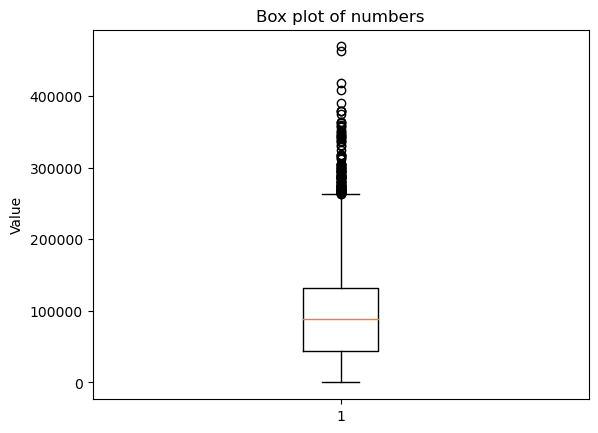

In [35]:
#Creating the box plot for ODOMETER
plt.boxplot(data['ODOMETER'])

# set the title and labels
plt.title("Box plot of numbers")
plt.ylabel("Value")

# show the plot
plt.show()

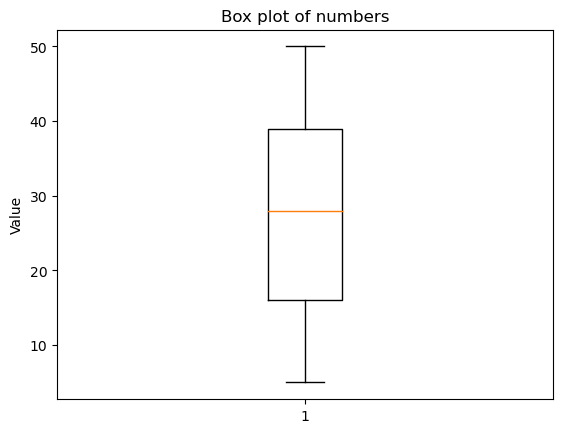

In [36]:
#Creating the box plot for MILAGE
plt.boxplot(data['MILAGE'])

# set the title and labels
plt.title("Box plot of numbers")
plt.ylabel("Value")

# show the plot
plt.show()

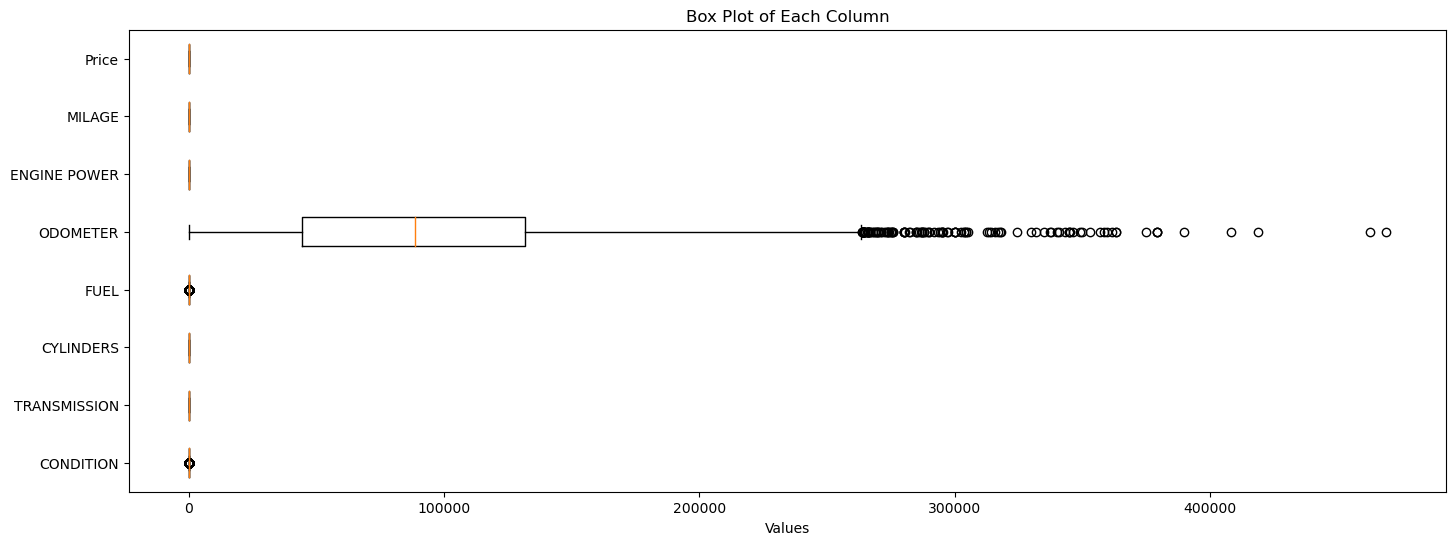

In [37]:
plt.figure(figsize=(17, 6))
plt.boxplot([dataCleaned[col] for col in dataCleaned.columns], vert=False)
plt.yticks(range(1, len(dataCleaned.columns) + 1), dataCleaned.columns)
plt.xlabel("Values")
plt.title("Box Plot of Each Column")
plt.show()

## 5. Let us now do some data analysis with graphs

### 5.1 Bar chart

A bar chart showing the number of cars per year

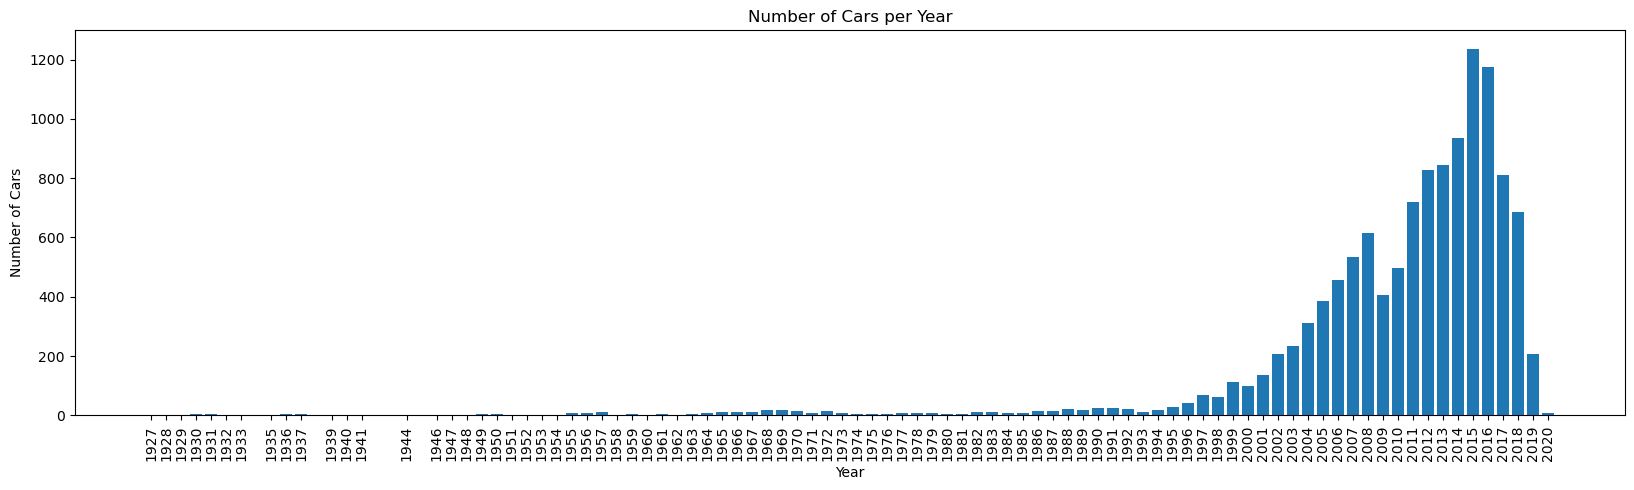

In [38]:
year_counts = data['YEAR'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Number of Cars per Year')
plt.xticks(rotation=90)
plt.xticks(year_counts.index)
plt.show()

A bar chart showing the number of cars per make:


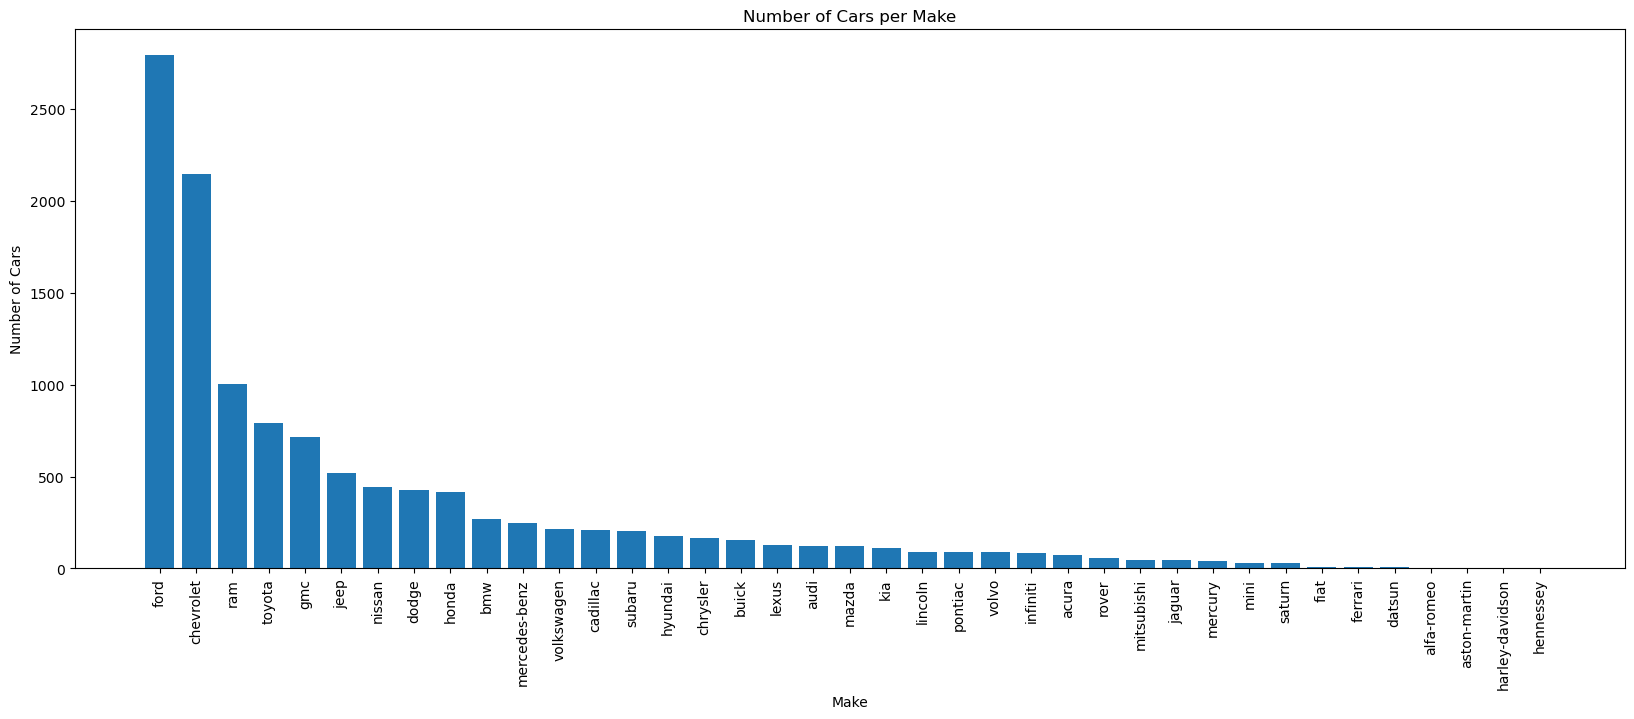

In [39]:
make_counts = data['MAKE'].value_counts()

plt.figure(figsize=(20, 7))
plt.bar(make_counts.index, make_counts.values)
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.title('Number of Cars per Make')
plt.xticks(rotation=90)
plt.show()

A bar chart showing the average odometer reading per make:

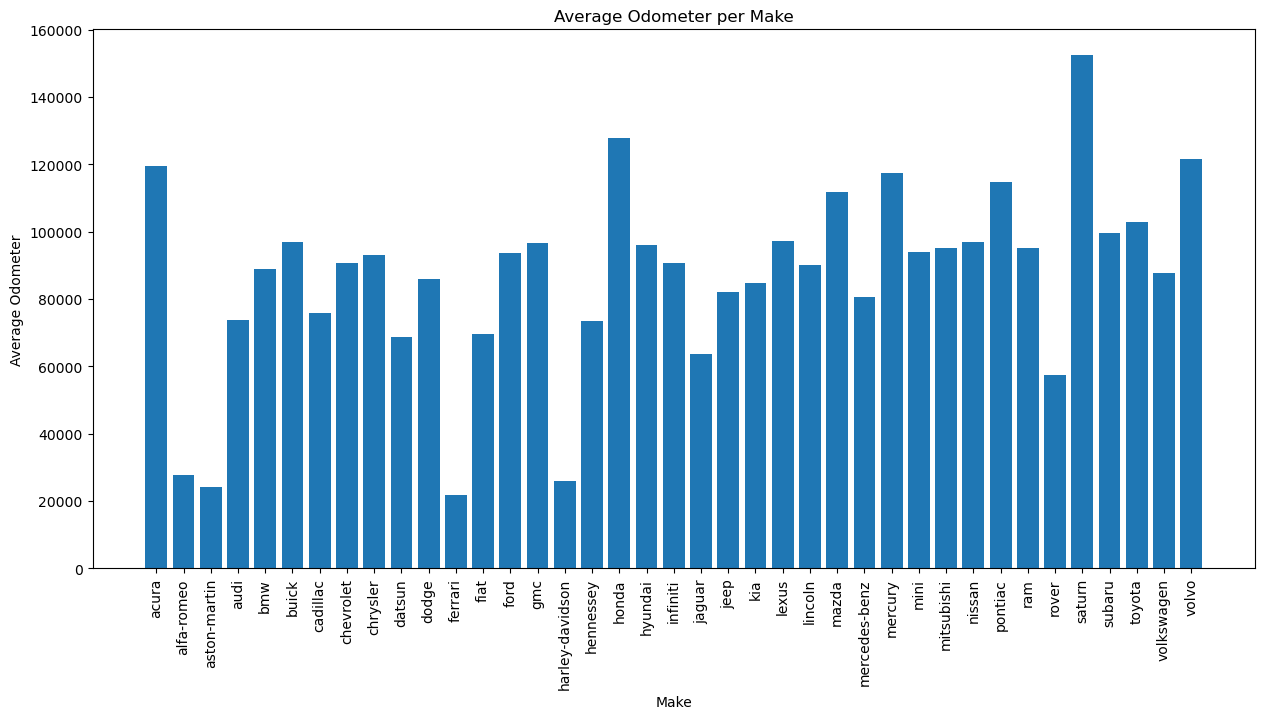

In [40]:
average_odometer_per_make = data.groupby('MAKE')['ODOMETER'].mean()

plt.figure(figsize=(15, 7))
plt.bar(average_odometer_per_make.index, average_odometer_per_make.values)
plt.xlabel('Make')
plt.ylabel('Average Odometer')
plt.title('Average Odometer per Make')
plt.xticks(rotation=90)
plt.show()

### 5.2 Scatter Plot

A scatter plot showing the relationship between odometer readings and car price:

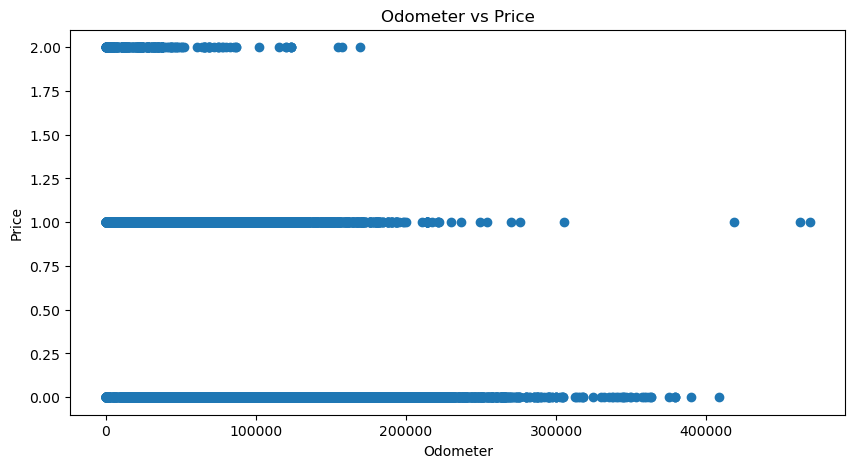

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(data['ODOMETER'], data['Price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Odometer vs Price')
plt.show()

### 5.3 Pie chart

A pie chart showing the distribution of transmission types:

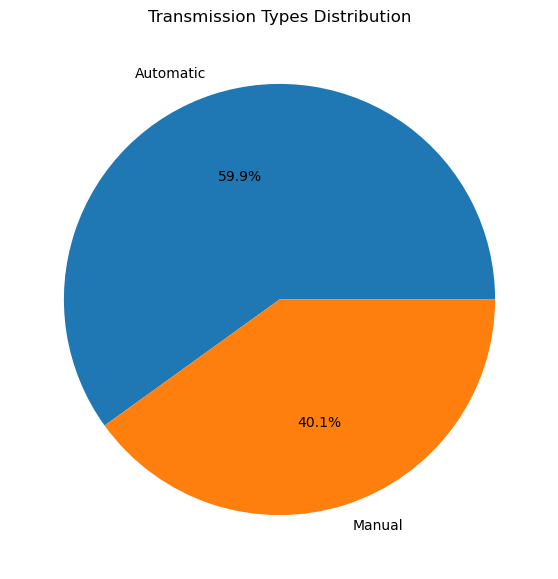

In [42]:
transmission_counts = data['TRANSMISSION'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(transmission_counts.values, labels=transmission_counts.index, autopct='%1.1f%%')
plt.title('Transmission Types Distribution')
plt.show()

### 5.4 Histogram

A histogram showing the distribution of odometer readings:

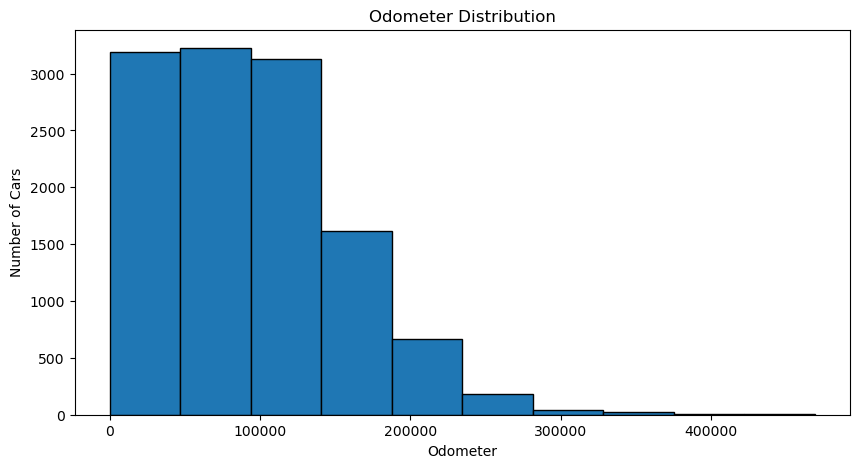

In [43]:
plt.figure(figsize=(10, 5))
plt.hist(data['ODOMETER'], bins=10, edgecolor='black')
plt.xlabel('Odometer')
plt.ylabel('Number of Cars')
plt.title('Odometer Distribution')
plt.show()

### 5.5 Violin plot

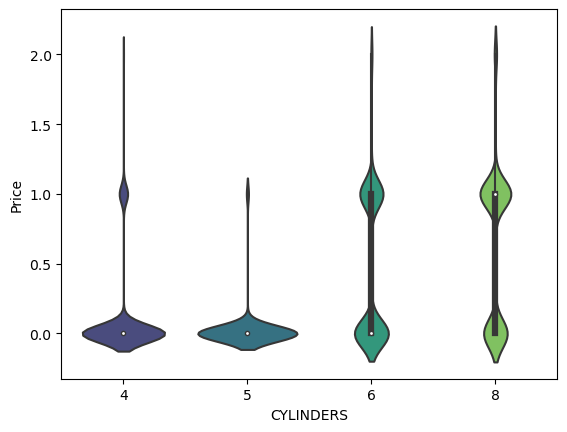

In [44]:
sns.violinplot(x='CYLINDERS', y='Price', data=dataCleaned, palette='viridis')
plt.show()

### 5.6 Box plot

A box plot showing the distribution of car prices:

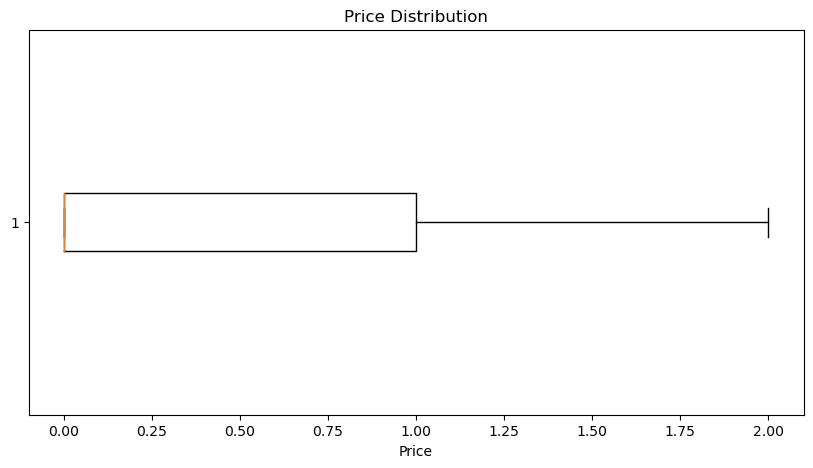

In [45]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['Price'], vert=False)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

### 5.7 Correlation matrix and heatmap

In [46]:
corr_matrix = dataCleaned.corr()
corr_matrix.round(2)

,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price
CONDITION,1.00,-0.00,0.04,0.05,-0.20,-0.04,0.01,0.12
TRANSMISSION,-0.00,1.00,0.01,-0.00,0.02,-0.00,-0.01,0.00
CYLINDERS,0.04,0.01,1.00,0.21,0.01,-0.14,0.01,0.36
FUEL,0.05,-0.00,0.21,1.00,0.10,-0.12,-0.01,0.32
ODOMETER,-0.20,0.02,0.01,0.10,1.00,0.15,0.01,-0.48
ENGINE POWER,-0.04,-0.00,-0.14,-0.12,0.15,1.00,0.00,-0.35
MILAGE,0.01,-0.01,0.01,-0.01,0.01,0.00,1.00,-0.01
Price,0.12,0.00,0.36,0.32,-0.48,-0.35,-0.01,1.00


#### Heatmap

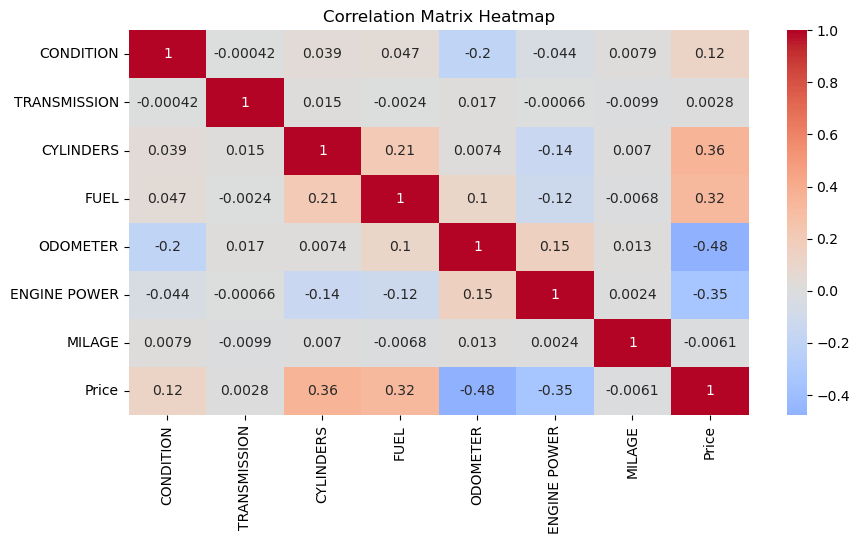

In [47]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

the relationships between the numeric variables and the 'Price' categories.

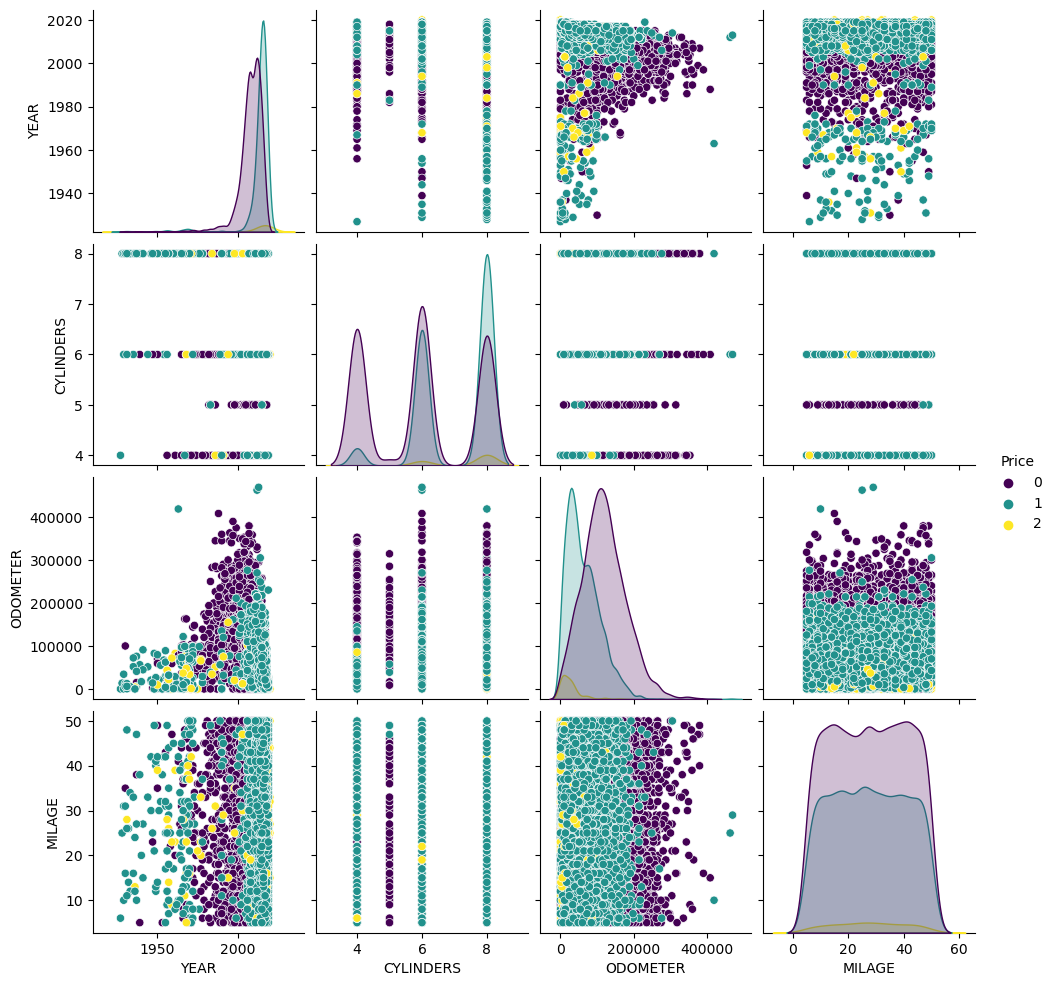

In [48]:

numeric_columns = ['YEAR', 'CYLINDERS', 'ODOMETER', 'MILAGE', 'Price']

# scatter_matrix(data[numeric_columns], figsize=(12, 12), diagonal='hist')
# plt.show()


sns.pairplot(data[numeric_columns], hue='Price', palette='viridis')
plt.show()


## More visualisation of the data

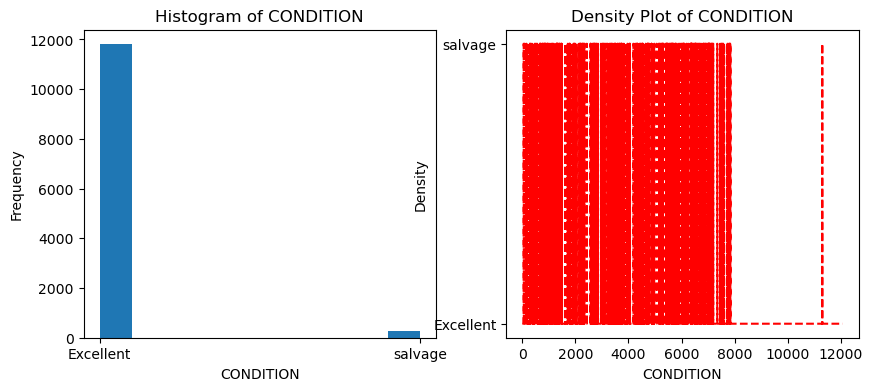

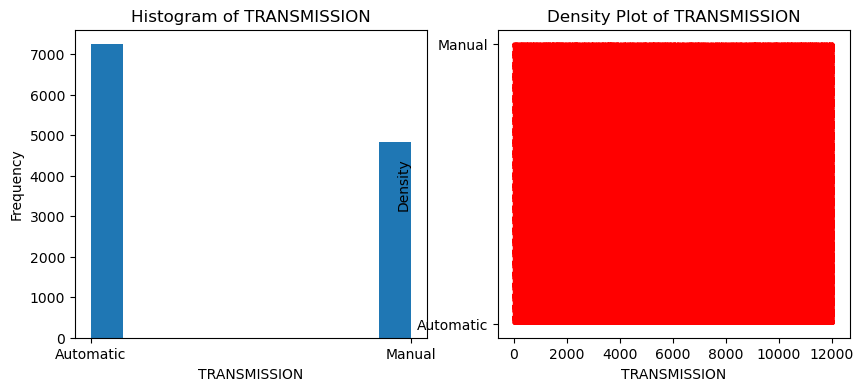

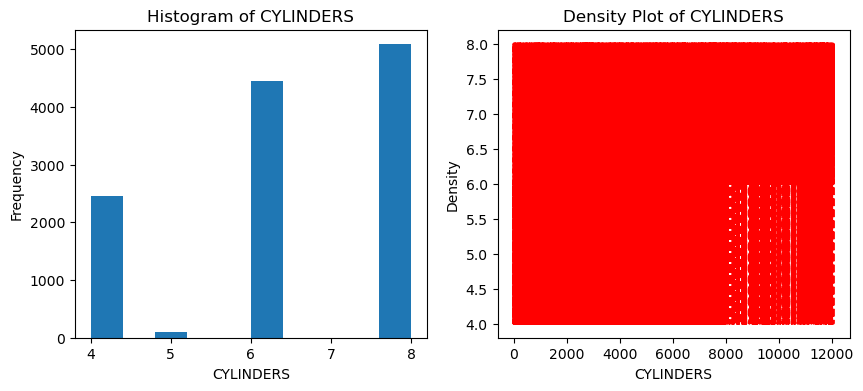

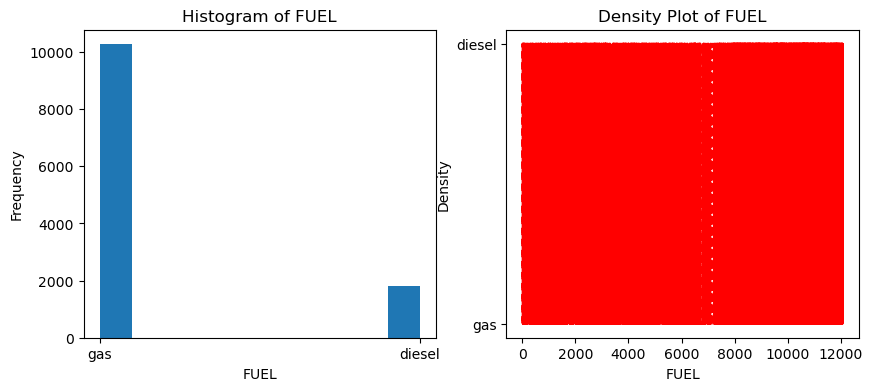

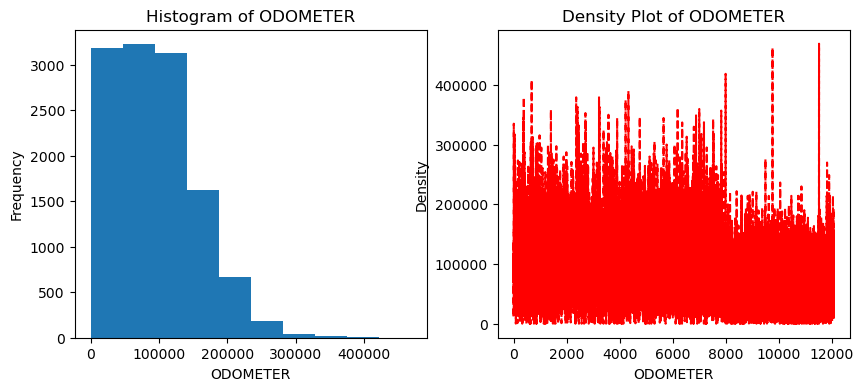

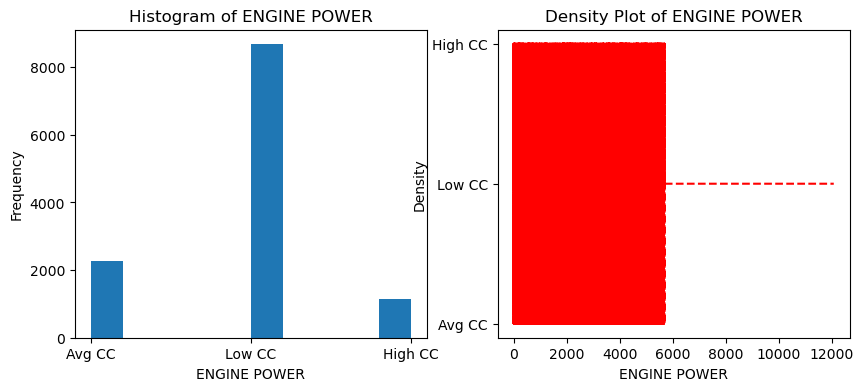

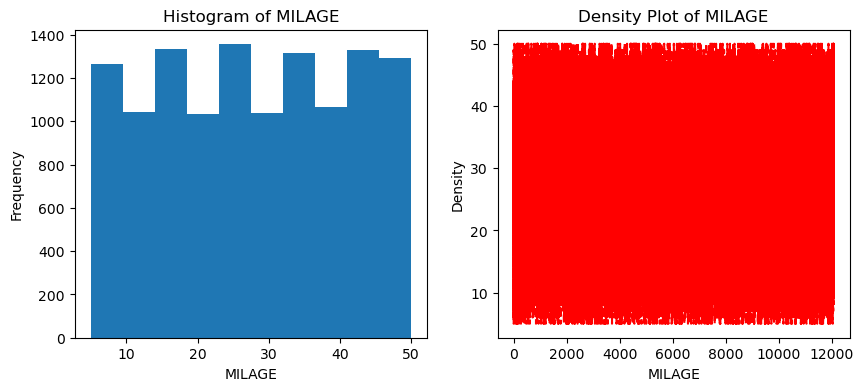

In [49]:
for col in ['CONDITION', 'TRANSMISSION', 'CYLINDERS','FUEL','ODOMETER', 'ENGINE POWER', 'MILAGE']:
    
    col_data = pd.to_numeric(data[col], errors= 'coerce'). dropna()
    
    fig, axs = plt.subplots (1, 2, figsize= (10, 4))
    axs[0].hist(data[col], bins=10) 
    axs[0].set_title(f'Histogram of {col}') 
    axs[0].set_xlabel(col)
    axs[0].set_ylabel ('Frequency')
    axs[1].plot(data[col], 'r--')
    axs[1].set_title(f'Density Plot of {col}')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Density')
    plt.show()

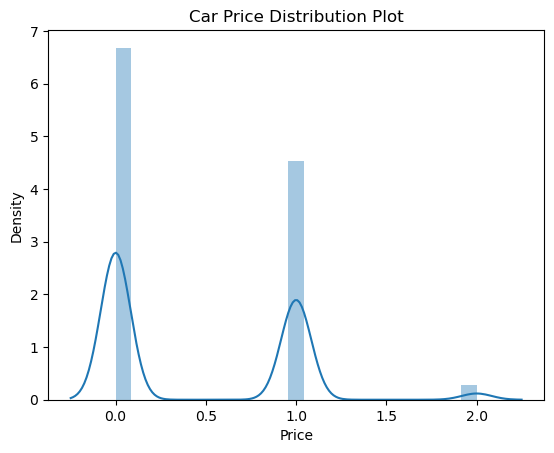

In [50]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.Price)
plt.show()

### Regression

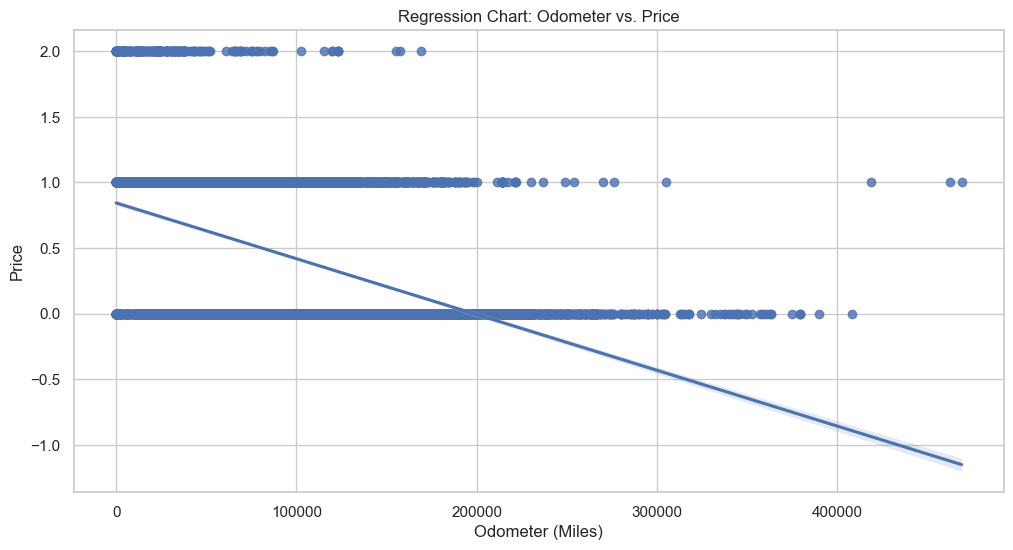

In [51]:
# Set the plot style
sns.set(style="whitegrid")

# Create a scatter plot with the regression line
plt.figure(figsize=(12, 6))
sns.regplot(x="ODOMETER", y="Price", data=data)

# Set the title and labels
plt.title("Regression Chart: Odometer vs. Price")
plt.xlabel("Odometer (Miles)")
plt.ylabel("Price")

# Display the plot
plt.show()

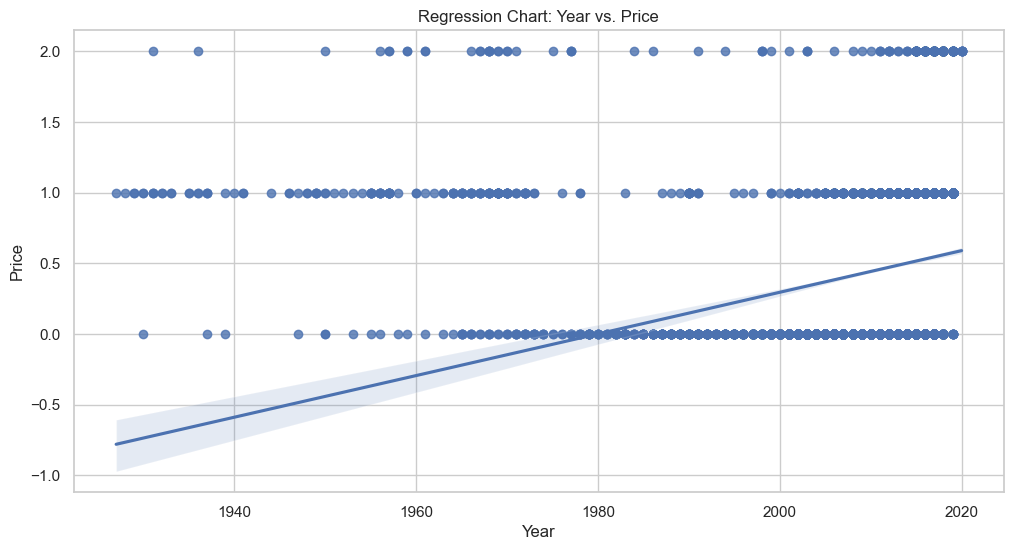

In [52]:
# Set the plot style
sns.set(style="whitegrid")

# Create a scatter plot with the regression line
plt.figure(figsize=(12, 6))
sns.regplot(x="YEAR", y="Price", data=data)

# Set the title and labels
plt.title("Regression Chart: Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")

# Display the plot
plt.show()

### Bar chart showing the distribution of the cars across the three price classes: cheap (0), average (1), and expensive (2).

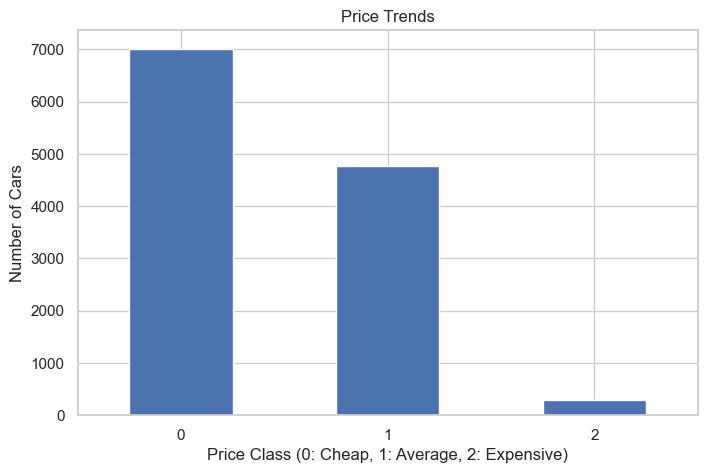

In [53]:
# Calculate the mean and standard deviation of non-zero prices
non_zero_prices = data[data['Price'] > 0]['Price']
mean_price = non_zero_prices.mean()
std_price = non_zero_prices.std()

# Define a function to classify cars based on their prices
def classify_car(price, mean, std):
    if price <= mean - std:
        return 0
    elif mean - std < price <= mean + std:
        return 1
    else:
        return 2

# Apply the classification function to the 'Price' column
data['PriceClass'] = data['Price'].apply(lambda x: classify_car(x, mean_price, std_price))

# Count the number of cars in each price class
price_counts = data['PriceClass'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(8, 5))
price_counts.plot(kind='bar')

# Set the title and labels
plt.title('Price Trends')
plt.xlabel('Price Class (0: Cheap, 1: Average, 2: Expensive)')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)

# Display the plot
plt.show()


Based on the graph we can conclude that most of the cars found in the dataset are cheap, followed by cars with an average price and very few are expensive

## 6 Reflection 

Throughout the process of working on both Excel and Jupyter Notebook assignments, I have gained valuable insights into the differences and similarities between Python and Excel.
Excel is particularly useful for small to medium-sized datasets and when collaborating with non-technical users. It is also a widely-used business tool, which facilitates seamless data sharing and reporting.
In contrast, Python is a versatile programming language that offers greater flexibility and scalability compared to Excel. It can handle large datasets efficiently and enables the creation of custom functions and advanced data manipulation through libraries like Pandas, NumPy, and Matplotlib.

I would use either of them based on the situation. For example, Python's strength lies in its ability to automate tasks, perform complex analyses, and integrate with other systems. Excel is more suitable for ad hoc analyses and situations where ease of use and collaboration are prioritized.

If I could do this assignment over, I would focus on exploring additional Python libraries to enhance data visualization, such as Seaborn and Plotly, which can help create more interactive and informative plots. I would also invest time in learning advanced Excel features, like Power Query and Power Pivot, to optimize my data analysis workflow within the application.

As for the gaps in my programming and statistics knowledge, I recognize the need to deepen my understanding of inferential statistics, hypothesis testing, and regression analysis to draw more accurate and meaningful conclusions from data. 

In conclusion, Python and Excel are complementary tools, each with its strengths and limitations. Determining when to use each depends on the specific task, dataset size, and desired outcome. Reflecting on my learnings, I recognize the importance of continuously expanding my programming and statistical knowledge to enhance my data analysis capabilities and better adapt to diverse challenges.